In [1]:
import pandas as pd

weather = pd.read_csv("weather.csv", index_col="date")

In [2]:
weather

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
date,,,,,,,,,,
2025-01-01 00:00:00,26.8,25.5,30.2,0.5,NaN,NaN,13.4,NaN,1010.5,NaN
2025-01-02 00:00:00,27.9,24.3,30.8,0.0,NaN,NaN,11.2,NaN,1010.0,NaN
2025-01-03 00:00:00,27.1,24.3,30.1,0.0,NaN,NaN,8.6,NaN,1009.9,NaN
2025-01-04 00:00:00,27.4,24.6,31.0,0.5,NaN,NaN,11.2,NaN,1009.9,NaN
2025-01-05 00:00:00,25.8,24.0,30.0,0.0,NaN,NaN,16.8,NaN,1011.2,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-08-28 00:00:00,26.5,NaN,NaN,NaN,NaN,NaN,9.2,NaN,1005.8,NaN
2025-08-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [4]:
null_pct

tavg    0.016393
tmin    0.024590
tmax    0.024590
prcp    0.036885
snow    1.000000
wdir    1.000000
wspd    0.045082
wpgt    1.000000
pres    0.045082
tsun    1.000000
dtype: float64

In [5]:
valid_columns = weather.columns[null_pct < .05]

In [6]:
valid_columns

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres'], dtype='object')

In [7]:
weather = weather[valid_columns].copy()

In [8]:
weather.columns = weather.columns.str.lower()

In [9]:
weather

,tavg,tmin,tmax,prcp,wspd,pres
date,,,,,,
2025-01-01 00:00:00,26.8,25.5,30.2,0.5,13.4,1010.5
2025-01-02 00:00:00,27.9,24.3,30.8,0.0,11.2,1010.0
2025-01-03 00:00:00,27.1,24.3,30.1,0.0,8.6,1009.9
2025-01-04 00:00:00,27.4,24.6,31.0,0.5,11.2,1009.9
2025-01-05 00:00:00,25.8,24.0,30.0,0.0,16.8,1011.2
...,...,...,...,...,...,...
2025-08-28 00:00:00,26.5,NaN,NaN,NaN,9.2,1005.8
2025-08-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2025-08-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
weather = weather.ffill()

In [11]:
weather.apply(pd.isnull).sum()

tavg    0
tmin    0
tmax    0
prcp    0
wspd    0
pres    0
dtype: int64

In [12]:
weather.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
wspd    float64
pres    float64
dtype: object

In [13]:
weather.index

Index(['2025-01-01 00:00:00', '2025-01-02 00:00:00', '2025-01-03 00:00:00',
       '2025-01-04 00:00:00', '2025-01-05 00:00:00', '2025-01-06 00:00:00',
       '2025-01-07 00:00:00', '2025-01-08 00:00:00', '2025-01-09 00:00:00',
       '2025-01-10 00:00:00',
       ...
       '2025-08-23 00:00:00', '2025-08-24 00:00:00', '2025-08-25 00:00:00',
       '2025-08-26 00:00:00', '2025-08-27 00:00:00', '2025-08-28 00:00:00',
       '2025-08-29 00:00:00', '2025-08-30 00:00:00', '2025-08-31 00:00:00',
       '2025-09-01 00:00:00'],
      dtype='object', name='date', length=244)

In [14]:
weather.index = pd.to_datetime(weather.index)

In [15]:
weather.index

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-08-23', '2025-08-24', '2025-08-25', '2025-08-26',
               '2025-08-27', '2025-08-28', '2025-08-29', '2025-08-30',
               '2025-08-31', '2025-09-01'],
              dtype='datetime64[ns]', name='date', length=244, freq=None)

In [16]:
weather.index.year

Index([2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='date', length=244)

In [17]:
weather.index.year.value_counts().sort_index()

date
2025    244
Name: count, dtype: int64

<Axes: xlabel='date'>

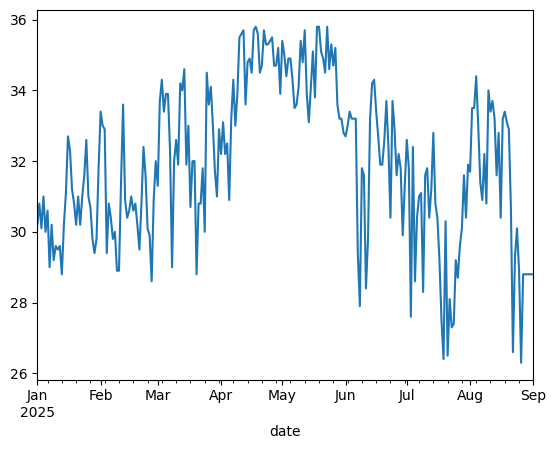

In [18]:
weather["tmax"].plot()

In [19]:
weather

,tavg,tmin,tmax,prcp,wspd,pres
date,,,,,,
2025-01-01,26.8,25.5,30.2,0.5,13.4,1010.5
2025-01-02,27.9,24.3,30.8,0.0,11.2,1010.0
2025-01-03,27.1,24.3,30.1,0.0,8.6,1009.9
2025-01-04,27.4,24.6,31.0,0.5,11.2,1009.9
2025-01-05,25.8,24.0,30.0,0.0,16.8,1011.2
...,...,...,...,...,...,...
2025-08-28,26.5,24.4,28.8,12.3,9.2,1005.8
2025-08-29,26.5,24.4,28.8,12.3,9.2,1005.8
2025-08-30,26.5,24.4,28.8,12.3,9.2,1005.8


In [20]:
weather["target"] = weather.shift(-1)["tmax"]

In [21]:
weather

,tavg,tmin,tmax,prcp,wspd,pres,target
date,,,,,,,
2025-01-01,26.8,25.5,30.2,0.5,13.4,1010.5,30.8
2025-01-02,27.9,24.3,30.8,0.0,11.2,1010.0,30.1
2025-01-03,27.1,24.3,30.1,0.0,8.6,1009.9,31.0
2025-01-04,27.4,24.6,31.0,0.5,11.2,1009.9,30.0
2025-01-05,25.8,24.0,30.0,0.0,16.8,1011.2,30.6
...,...,...,...,...,...,...,...
2025-08-28,26.5,24.4,28.8,12.3,9.2,1005.8,28.8
2025-08-29,26.5,24.4,28.8,12.3,9.2,1005.8,28.8
2025-08-30,26.5,24.4,28.8,12.3,9.2,1005.8,28.8


In [22]:
weather = weather.ffill()

In [23]:
weather

,tavg,tmin,tmax,prcp,wspd,pres,target
date,,,,,,,
2025-01-01,26.8,25.5,30.2,0.5,13.4,1010.5,30.8
2025-01-02,27.9,24.3,30.8,0.0,11.2,1010.0,30.1
2025-01-03,27.1,24.3,30.1,0.0,8.6,1009.9,31.0
2025-01-04,27.4,24.6,31.0,0.5,11.2,1009.9,30.0
2025-01-05,25.8,24.0,30.0,0.0,16.8,1011.2,30.6
...,...,...,...,...,...,...,...
2025-08-28,26.5,24.4,28.8,12.3,9.2,1005.8,28.8
2025-08-29,26.5,24.4,28.8,12.3,9.2,1005.8,28.8
2025-08-30,26.5,24.4,28.8,12.3,9.2,1005.8,28.8


In [24]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [25]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [26]:
predictors

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres'], dtype='object')

In [31]:
def backtest(weather, model, predictors, start=180, step=90):
    all_predictions = []
    
    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors], train["target"])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [32]:
predictions = backtest(weather, rr, predictors)

In [33]:
predictions

,actual,prediction,diff
date,,,
2025-06-30,32.6,31.102988,1.497012
2025-07-01,31.8,32.413176,0.613176
2025-07-02,27.6,31.890049,4.290049
2025-07-03,32.4,29.666241,2.733759
2025-07-04,28.6,32.059210,3.459210
...,...,...,...
2025-08-28,28.8,29.711299,0.911299
2025-08-29,28.8,29.711299,0.911299
2025-08-30,28.8,29.711299,0.911299


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

1.3840283135851286

In [35]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather
    
rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [36]:
weather

,tavg,tmin,tmax,prcp,wspd,pres,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
date,,,,,,,,,,,,,,,,,,,
2025-01-01,26.8,25.5,30.2,0.5,13.4,1010.5,30.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02,27.9,24.3,30.8,0.0,11.2,1010.0,30.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,27.1,24.3,30.1,0.0,8.6,1009.9,31.0,30.366667,-0.008782,24.700000,-0.016194,0.166667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-04,27.4,24.6,31.0,0.5,11.2,1009.9,30.0,30.633333,0.011970,24.400000,0.008197,0.166667,2.000000,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-05,25.8,24.0,30.0,0.0,16.8,1011.2,30.6,30.366667,-0.012075,24.300000,-0.012346,0.166667,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-28,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,27.966667,0.029797,24.233333,0.006878,19.400000,-0.365979,30.378571,-0.051963,24.578571,-0.007265,10.642857,0.155705
2025-08-29,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,28.800000,0.000000,24.400000,0.000000,12.300000,0.000000,30.092857,-0.042962,24.578571,-0.007265,10.907143,0.127701
2025-08-30,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,28.800000,0.000000,24.400000,0.000000,12.300000,0.000000,29.978571,-0.039314,24.564286,-0.006688,11.114286,0.106684


In [37]:
weather = weather.iloc[14:,:]

In [38]:
weather

,tavg,tmin,tmax,prcp,wspd,pres,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
date,,,,,,,,,,,,,,,,,,,
2025-01-15,27.0,23.6,31.1,0.0,13.8,1013.6,32.7,30.033333,0.035516,23.533333,0.002833,0.1,-1.000000,29.978571,0.037408,23.485714,0.004866,0.407143,-1.000000
2025-01-16,26.7,22.8,32.7,0.0,19.2,1012.7,32.3,31.333333,0.043617,23.333333,-0.022857,0.0,NaN,30.114286,0.085863,23.378571,-0.024748,0.407143,-1.000000
2025-01-17,27.5,22.6,32.3,0.0,16.9,1012.1,31.2,32.033333,0.008325,23.000000,-0.017391,0.0,NaN,30.271429,0.067013,23.257143,-0.028256,0.407143,-1.000000
2025-01-18,27.0,24.6,31.2,0.0,14.6,1010.9,30.8,32.066667,-0.027027,23.333333,0.054286,0.0,NaN,30.285714,0.030189,23.257143,0.057740,0.371429,-1.000000
2025-01-19,27.6,23.0,30.8,0.0,11.1,1009.1,30.2,31.433333,-0.020148,23.400000,-0.017094,0.0,NaN,30.342857,0.015066,23.185714,-0.008010,0.371429,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-28,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,27.966667,0.029797,24.233333,0.006878,19.4,-0.365979,30.378571,-0.051963,24.578571,-0.007265,10.642857,0.155705
2025-08-29,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,28.800000,0.000000,24.400000,0.000000,12.3,0.000000,30.092857,-0.042962,24.578571,-0.007265,10.907143,0.127701
2025-08-30,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,28.800000,0.000000,24.400000,0.000000,12.3,0.000000,29.978571,-0.039314,24.564286,-0.006688,11.114286,0.106684


In [39]:
weather = weather.fillna(0)

In [40]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [41]:
weather

,tavg,tmin,tmax,prcp,wspd,pres,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2025-01-15,27.0,23.6,31.1,0.0,13.8,1013.6,32.7,30.033333,0.035516,23.533333,...,23.485714,0.004866,0.407143,-1.000000,31.100000,31.1,23.600000,23.6,0.000000,0.0
2025-01-16,26.7,22.8,32.7,0.0,19.2,1012.7,32.3,31.333333,0.043617,23.333333,...,23.378571,-0.024748,0.407143,-1.000000,31.900000,32.7,23.200000,22.8,0.000000,0.0
2025-01-17,27.5,22.6,32.3,0.0,16.9,1012.1,31.2,32.033333,0.008325,23.000000,...,23.257143,-0.028256,0.407143,-1.000000,32.033333,32.3,23.000000,22.6,0.000000,0.0
2025-01-18,27.0,24.6,31.2,0.0,14.6,1010.9,30.8,32.066667,-0.027027,23.333333,...,23.257143,0.057740,0.371429,-1.000000,31.825000,31.2,23.400000,24.6,0.000000,0.0
2025-01-19,27.6,23.0,30.8,0.0,11.1,1009.1,30.2,31.433333,-0.020148,23.400000,...,23.185714,-0.008010,0.371429,-1.000000,31.620000,30.8,23.320000,23.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-28,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,27.966667,0.029797,24.233333,...,24.578571,-0.007265,10.642857,0.155705,31.521429,28.8,25.014286,24.4,7.189286,12.3
2025-08-29,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,28.800000,0.000000,24.400000,...,24.578571,-0.007265,10.907143,0.127701,31.427586,28.8,24.993103,24.4,7.365517,12.3
2025-08-30,26.5,24.4,28.8,12.3,9.2,1005.8,28.8,28.800000,0.000000,24.400000,...,24.564286,-0.006688,11.114286,0.106684,31.340000,28.8,24.973333,24.4,7.530000,12.3


In [42]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [43]:
predictors

Index(['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres', 'rolling_3_tmax',
       'rolling_3_tmax_pct', 'rolling_3_tmin', 'rolling_3_tmin_pct',
       'rolling_3_prcp', 'rolling_3_prcp_pct', 'rolling_14_tmax',
       'rolling_14_tmax_pct', 'rolling_14_tmin', 'rolling_14_tmin_pct',
       'rolling_14_prcp', 'rolling_14_prcp_pct', 'month_avg_tmax',
       'day_avg_tmax', 'month_avg_tmin', 'day_avg_tmin', 'month_avg_prcp',
       'day_avg_prcp'],
      dtype='object')

In [44]:
predictions = backtest(weather, rr, predictors)

In [45]:
mean_absolute_error(predictions["actual"], predictions["prediction"])

1.4922570905587338

In [46]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
date,,,
2025-08-21,26.6,32.124248,5.524248
2025-07-20,26.5,31.266146,4.766146
2025-08-25,26.3,30.340338,4.040338
2025-07-22,27.3,31.033970,3.733970
2025-07-24,29.2,26.297762,2.902238
2025-08-04,33.0,35.897248,2.897248
2025-07-17,27.5,30.016669,2.516669
2025-08-20,30.7,33.082636,2.382636
2025-08-24,28.9,31.193878,2.293878


In [47]:
weather.loc["2025-03-07": "2025-03-17"]

,tavg,tmin,tmax,prcp,wspd,pres,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
date,,,,,,,,,,,,,,,,,,,,,
2025-03-07,28.6,23.4,32.3,2.1,16.7,1010.8,29.0,33.366667,-0.031968,24.533333,...,23.642857,-0.010272,0.264286,6.945946,33.257143,32.3,24.357143,23.4,0.528571,2.1
2025-03-08,26.3,25.1,29.0,2.5,12.8,1011.9,32.0,31.733333,-0.086134,24.766667,...,23.735714,0.057478,0.442857,4.645161,32.725000,29.0,24.450000,25.1,0.775000,2.5
2025-03-09,27.0,24.5,32.0,0.4,17.3,1014.0,32.6,31.100000,0.028939,24.333333,...,23.807143,0.029103,0.471429,-0.151515,32.644444,32.0,24.455556,24.5,0.733333,0.4
2025-03-10,27.4,24.0,32.6,0.0,17.6,1014.6,31.9,31.200000,0.044872,24.533333,...,23.921429,0.003285,0.471429,-1.000000,32.640000,32.6,24.410000,24.0,0.660000,0.0
2025-03-11,27.9,23.7,31.9,0.0,16.4,1012.9,34.2,32.166667,-0.008290,24.066667,...,23.892857,-0.008072,0.471429,-1.000000,32.572727,31.9,24.345455,23.7,0.600000,0.0
2025-03-12,29.9,23.4,34.2,0.0,17.8,1011.8,34.0,32.900000,0.039514,23.700000,...,23.864286,-0.019455,0.471429,-1.000000,32.708333,34.2,24.266667,23.4,0.550000,0.0
2025-03-13,28.3,26.1,34.0,0.0,18.1,1011.8,34.6,33.366667,0.018981,24.400000,...,24.200000,0.078512,0.471429,-1.000000,32.807692,34.0,24.407692,26.1,0.507692,0.0
2025-03-14,29.1,25.8,34.6,0.0,19.2,1011.8,31.9,34.266667,0.009728,25.100000,...,24.507143,0.052754,0.471429,-1.000000,32.935714,34.6,24.507143,25.8,0.471429,0.0
2025-03-15,28.2,22.1,31.9,0.0,19.2,1011.8,33.0,33.500000,-0.047761,24.666667,...,24.528571,-0.099010,0.471429,-1.000000,32.866667,31.9,24.346667,22.1,0.440000,0.0


<Axes: xlabel='diff'>

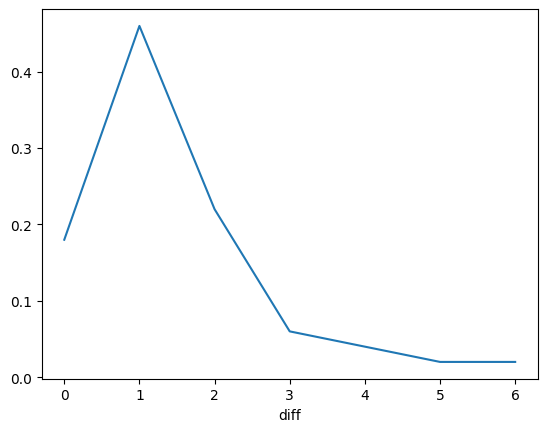

In [48]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [50]:
mean_squared_error(predictions["actual"], predictions["prediction"])

3.6160251296613226

In [51]:
predictions

,actual,prediction,diff
date,,,
2025-07-14,30.8,32.309138,1.509138
2025-07-15,30.4,31.419377,1.019377
2025-07-16,29.2,31.098766,1.898766
2025-07-17,27.5,30.016669,2.516669
2025-07-18,26.4,28.471917,2.071917
2025-07-19,30.3,28.244890,2.055110
2025-07-20,26.5,31.266146,4.766146
2025-07-21,28.1,27.181937,0.918063
2025-07-22,27.3,31.033970,3.733970
